In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import tifffile

In [2]:
bias_frames_folder = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Lightspeed/qCMOS Testing/Bias Frames'
bias_frames = np.zeros((1000, 2304, 4096), dtype=np.uint16)
for i, bias_frames_file in enumerate(os.listdir(bias_frames_folder)):
    print(f'Processing {bias_frames_file}')
    # Read the TIFF file
    img = tifffile.imread(os.path.join(bias_frames_folder, bias_frames_file))
    bias_frames[200*i:200*(i+1), :, :] = img

Processing bias_frames_ultraquiet_2.tif


KeyboardInterrupt: 

In [11]:
mean_bias_frame = np.mean(bias_frames, axis=0)
var_bias_frame = np.var(bias_frames, axis=0)

In [21]:
gain = 8.773 # ADU/e-. From software, not actually measured
std_bias_frame = np.sqrt(var_bias_frame)
read_noise_frame = std_bias_frame / gain
read_noise_mean = np.mean(std_bias_frame) / gain
read_noise_median = np.median(std_bias_frame) / gain
read_noise_rms = np.sqrt(np.mean(var_bias_frame)) / gain

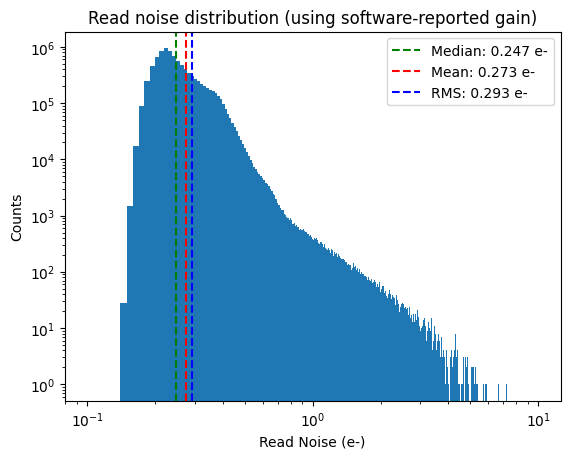

In [65]:
plt.hist(read_noise_frame.flatten(), bins=1000, range=(0.1, 10))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Read Noise (e-)')
plt.ylabel('Counts')
# Vertical lines for median, mean, and RMS
plt.axvline(read_noise_median, color='g', linestyle='--', label='Median: {:.3f} e-'.format(read_noise_median))
plt.axvline(read_noise_mean, color='r', linestyle='--', label='Mean: {:.3f} e-'.format(read_noise_mean))
plt.axvline(read_noise_rms, color='b', linestyle='--', label='RMS: {:.3f} e-'.format(read_noise_rms))
plt.title('Read noise distribution (using software-reported gain)')
plt.legend()
plt.show()

In [92]:
sigma = 2
indices = []
for i in range(8):
    index = np.unravel_index(np.abs(read_noise_frame - sigma - i / 100).argmin(), read_noise_frame.shape)
    indices.append(index)

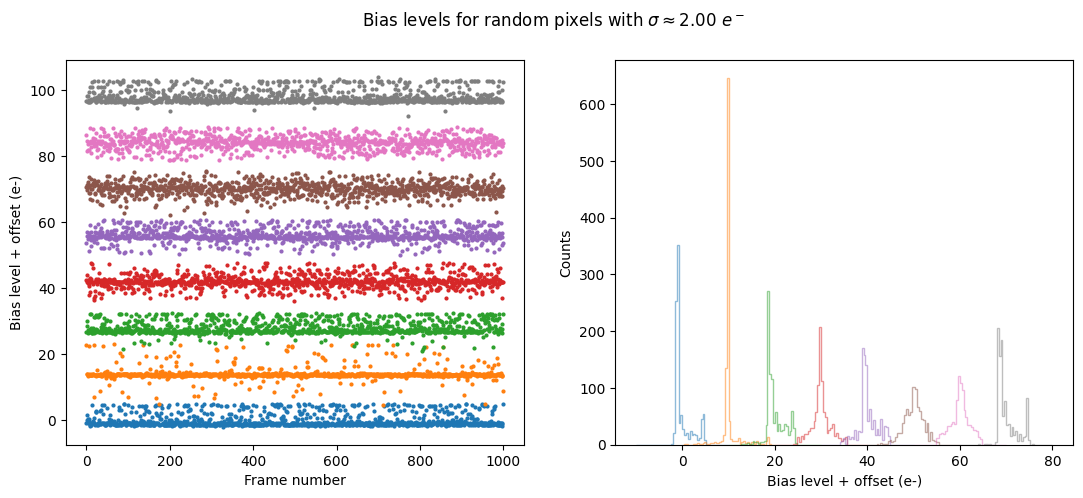

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.subplots_adjust(hspace=0.4)
for i in range(len(indices)):
    bias_levels_e_i = bias_frames[:, indices[i][0], indices[i][1]] - mean_bias_frame[indices[i][0], indices[i][1]]
    bias_levels_e_i = bias_levels_e_i / gain
    axs[0].plot(bias_levels_e_i + 7 * i * sigma, 'o', markersize=2, label=f'Pixel {i+1}')
    axs[1].hist(bias_levels_e_i + 10 * i, bins=50, range=(-10 + 10 * i, 10 + 10 * i), alpha=0.5, label=f'Pixel {i+1}', histtype='step')
axs[0].set_xlabel('Frame number')
axs[0].set_ylabel('Bias level + offset (e-)')
plt.suptitle(r'Bias levels for random pixels with $\sigma \approx${:.2f} $e^-$'.format(sigma))
axs[1].set_xlabel('Bias level + offset (e-)')
axs[1].set_ylabel('Counts')
plt.show()

